### Task 1 : Titanic Survival Prediction

Importing required modules

In [39]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Loading data

In [2]:
dataset = pd.read_csv("format1.csv", parse_dates=["Date","Time"])
data = dataset.copy()

Data inspection

In [3]:
data.head(4)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-12-15 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-12-15 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-12-15 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-12-15 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   351 non-null    object        
 1   City                     351 non-null    object        
 2   Customer type            351 non-null    object        
 3   Gender                   351 non-null    object        
 4   Product line             351 non-null    object        
 5   Unit price               351 non-null    float64       
 6   Quantity                 351 non-null    int64         
 7   Tax 5%                   351 non-null    float64       
 8   Total                    351 non-null    float64       
 9   Date                     351 non-null    datetime64[ns]
 10  Time                     351 non-null    datetime64[ns]
 11  Payment                  351 non-null    object        
 12  cogs                     351 non-nul

Data summary statistics

In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,55.944473,5.783476,16.329231,342.913846,326.584615,4.761905,16.329231,6.947009
std,27.088309,2.841300,11.955002,251.055049,239.100046,0.000000,11.955002,1.725386
min,10.590000,1.000000,0.627000,13.167000,12.540000,4.761905,0.627000,4.000000
25%,31.990000,4.000000,6.841500,143.671500,136.830000,4.761905,6.841500,5.500000
50%,55.730000,6.000000,13.228000,277.788000,264.560000,4.761905,13.228000,6.900000
75%,78.465000,8.000000,24.052250,505.097250,481.045000,4.761905,24.052250,8.400000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


Pre-processing EDA

In [6]:
columns = ['Branch','City','Customer type','Gender','Product line','Payment']

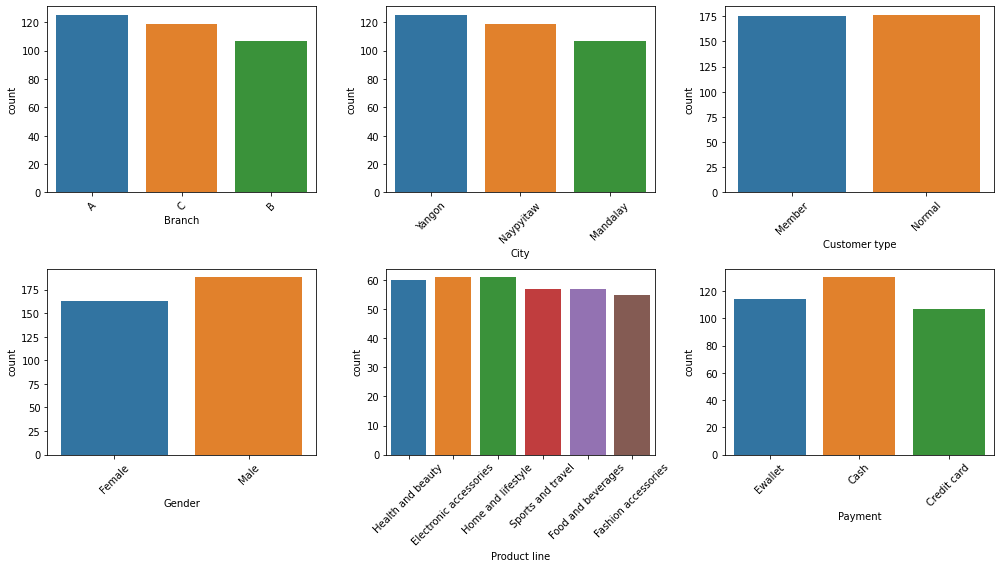

In [7]:
plt.figure(figsize=(14,8))
for i in range(len(columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=data[columns[i]])
    plt.xticks(rotation=45)
plt.tight_layout()

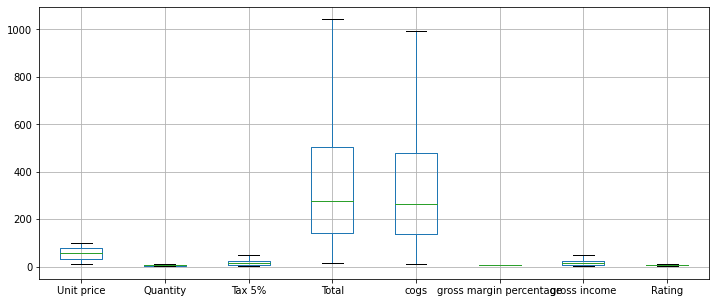

In [8]:
plt.figure(figsize=(12,5))
data.boxplot()
plt.show()

Data pre-processing 

In [9]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-12-15 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-12-15 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-12-15 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-12-15 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-12-15 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


- Handling "Date" column 

Extracting day, year, month from the columns 

In [10]:
data.insert(9,"day",data.Date.dt.day)
data.insert(10,"month",data.Date.dt.month)
data.insert(11,"year",data.Date.dt.year)

In [11]:
#Now dropping the "Date" column
data.drop(columns=["Date"], inplace=True)

- Handling "Time" column

Extracting hour, minute from Time columns

In [12]:
data.insert(12,"hour",data.Time.dt.hour)
data.insert(13,"minute",data.Time.dt.minute)

In [13]:
#Now dropping the "Time" column
data.drop(columns=["Time"], inplace=True)

In [14]:
data.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,day,month,year,hour,minute,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,5,1,2019,13,8,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,8,3,2019,10,29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,3,2019,13,23,Credit card,324.31,4.761905,16.2155,7.4


- Scaling numerical data

In [15]:
columns = ["Unit price", "Tax 5%", "Total", "cogs", "gross margin percentage", "gross income"]

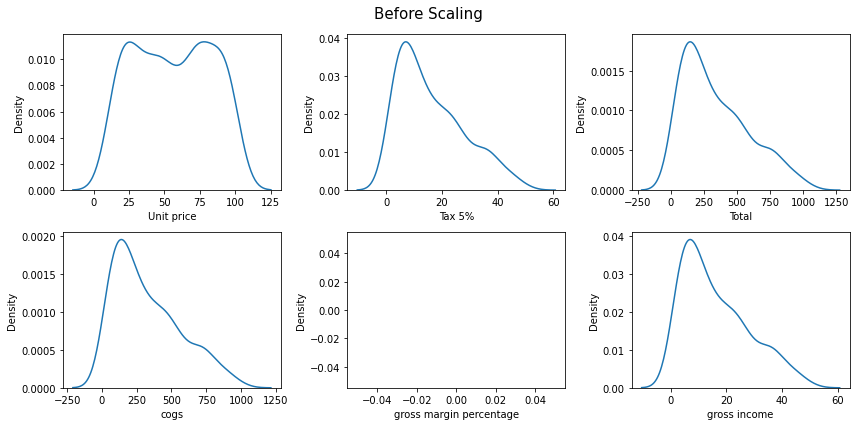

In [16]:
plt.figure(figsize=(12,6))
for i in range(len(columns)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=data[columns[i]])
plt.suptitle("Before Scaling", fontsize=15)
plt.tight_layout()

In [17]:
pipeline = Pipeline([
    ("Standard scaler",StandardScaler()),
    ("Robust scaler", RobustScaler())
])

In [18]:
data[columns] = pipeline.fit_transform(data[columns])

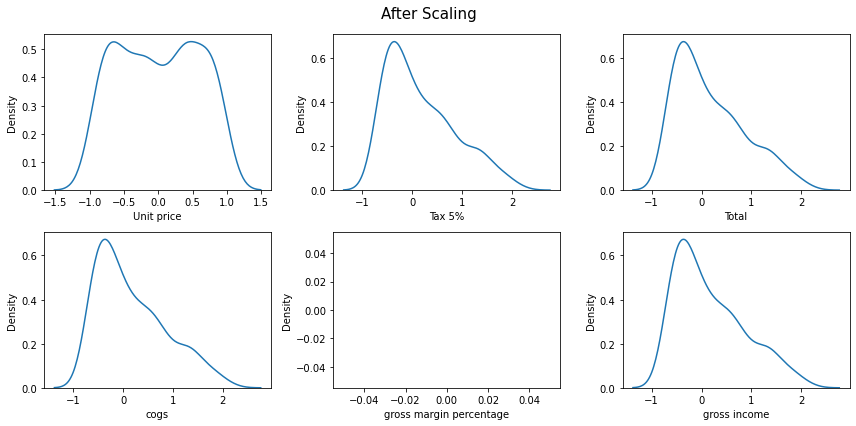

In [19]:
plt.figure(figsize=(12,6))
for i in range(len(columns)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=data[columns[i]])
plt.suptitle("After Scaling", fontsize=15)
plt.tight_layout()

- Encoding Data

In [20]:
data.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,day,month,year,hour,minute,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,0.407961,7,0.750316,0.750316,5,1,2019,13,8,Ewallet,0.750316,0.0,0.750316,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,-0.870360,5,-0.546635,-0.546635,8,3,2019,10,29,Cash,-0.546635,0.0,-0.546635,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,-0.202259,7,0.173583,0.173583,3,3,2019,13,23,Credit card,0.173583,0.0,0.173583,7.4


In [21]:
columns = ['Branch','City','Customer type','Gender','Product line','Payment']

In [22]:
for col in columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [23]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,day,month,year,hour,minute,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,0.407961,7,0.750316,0.750316,5,1,2019,13,8,2,0.750316,0.0,0.750316,9.1
1,2,1,1,0,0,-0.870360,5,-0.546635,-0.546635,8,3,2019,10,29,0,-0.546635,0.0,-0.546635,9.6
2,0,2,1,1,4,-0.202259,7,0.173583,0.173583,3,3,2019,13,23,1,0.173583,0.0,0.173583,7.4
3,0,2,0,1,3,0.053577,8,0.584518,0.584518,27,1,2019,20,33,2,0.584518,0.0,0.584518,8.4
4,0,2,1,1,5,0.657988,7,0.986622,0.986622,8,2,2019,10,37,2,0.986622,0.0,0.986622,5.3


Data Splitting 

In [24]:
X = data.drop(columns=["Rating"])
y = data["Rating"]
X.shape, y.shape

((351, 18), (351,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Model Selection

- Model training

In [29]:
#Linear regresssion model
linear_model = LinearRegression().fit(X_train, y_train)

#Random forest model
rf_model = RandomForestRegressor().fit(X_train, y_train)

#Gradient boosting model
gb_model = GradientBoostingRegressor().fit(X_train, y_train)

- Making predictions

In [30]:
#Linear regresssion predictions
linear_preds = linear_model.predict(X_test)

#Random forest predictions
rf_preds = rf_model.predict(X_test)

#Gradient boosting predictions
gb_preds = gb_model.predict(X_test)

Model Evaluation 

In [52]:
def evaluate(model_name, y_preds, y_test=y_test):
    plt.figure(figsize=(10, 5))
    # Scatter plot of actual vs. predicted values
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_preds)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')

    # Residual plot : Plot the residuals (the differences between actual and predicted values) against the predicted values. This helps you identify patterns or trends in the errors.
    plt.subplot(1, 2, 2)
    residuals = y_test - y_preds
    plt.scatter(y_preds, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

    # Error Metrics
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)
    print(f"Model : {model_name}")
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

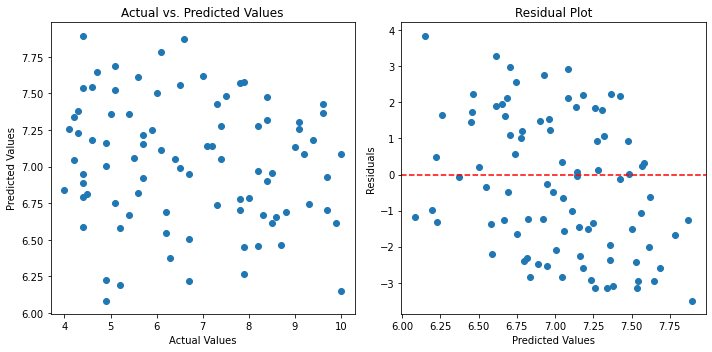

Model : Linear regression
Mean Squared Error (MSE): 3.68
Root Mean Squared Error (RMSE): 1.92
Mean Absolute Error (MAE): 1.67
R-squared (R2): -0.15


In [53]:
evaluate("Linear regression",linear_preds)

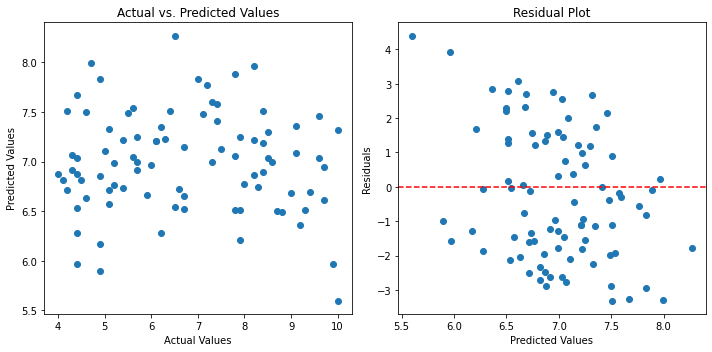

Model : random forest
Mean Squared Error (MSE): 3.62
Root Mean Squared Error (RMSE): 1.90
Mean Absolute Error (MAE): 1.64
R-squared (R2): -0.13


In [54]:
evaluate("random forest",rf_preds)

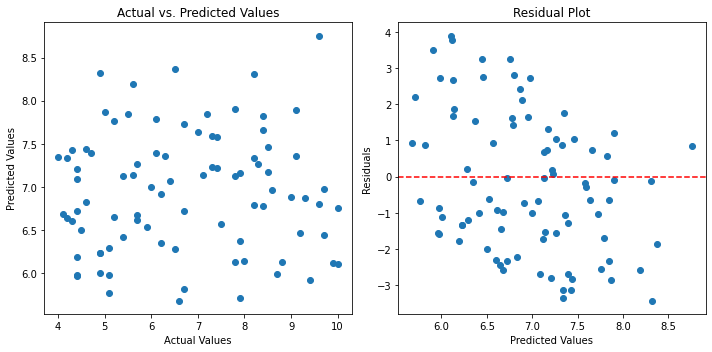

Model : gradient boosting
Mean Squared Error (MSE): 3.63
Root Mean Squared Error (RMSE): 1.91
Mean Absolute Error (MAE): 1.62
R-squared (R2): -0.14


In [55]:
evaluate("gradient boosting", gb_preds)

Conclusion 

- Random forest is giving the best results